## AI-guided discovery of the invariant host response to viral pandemics

Debashis Sahoo, Gajanan D Katkar, Soni Khandelwal, Mahdi Behroozikhah, Amanraj Claire, Vanessa Castillo, Courtney Tindle, MacKenzie Fuller, Sahar Taheri, Thomas F Rogers, Nathan Beutler, Sydney I Ramirez, Stephen A Rawlings, Victor Pretorius, Davey M Smith, Dennis R Burton, Laura E Crotty Alexander, Jason Duran, Shane Crotty, Jennifer M Dan, Soumita Das, Pradipta Ghosh

<a href="https://pubmed.ncbi.nlm.nih.gov/34127431/"> EBioMedicine. 2021 Jun 11;103390. doi: 10.1016/j.ebiom.2021.103390. </a>


In [1]:
# IMPORT STATEMENTS
import re
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon")
sys.path.append("../")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']
try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def getPDF(cfile):
    from matplotlib.backends.backend_pdf import PdfPages
    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Debashis Sahoo'
    d['Subject'] = "Covid-19"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 6, 19)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

## ViP and sViP signature

In [2]:
import bone
reload(bone)
class CoVAnalysis(bone.IBDAnalysis):

    def __init__(self):
        bone.IBDAnalysis.__init__(self)

    def getMitchell2013(self, tn=1):
        self.prepareData("MACV104", "explore.conf")
        time = self.h.getSurvName("c timepoint")
        atype = [re.sub("h.*", "", str(k)) for k in time]
        ahash = {'0':0, '18':3, '12':2, '6':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName("c infection code")
        atypes = ['C', 'I']
        ahash = {'BatSRBD':1, 'icSARS':1, 'Mock':0, 'dORF6':1, 'H1N1':1, 'mock':0}
        aval = [ahash[i] if i in ahash else None for i in atype]
        if (tn == 2):
            atype = self.h.getSurvName("c infection code")
            ahash = {'BatSRBD':1, 'icSARS':1, 'Mock':0, 'mock':0}
            aval = [ahash[i] if i in ahash else None for i in atype]
            atype = ['C' if aval[i] == 1 and tval[i] == 0 else atype[i]
                    for i in range(len(atype))]
        if (tn == 3):
            atype = self.h.getSurvName("c infection code")
            ahash = {'H1N1':1, 'Mock':0, 'mock':0}
            aval = [ahash[i] if i in ahash else None for i in atype]
            atype = ['C' if aval[i] == 1 and tval[i] == 0 else atype[i]
                    for i in range(len(atype))]
        self.initData(atype, atypes, ahash)

    def getJones2019(self, tn=1):
        self.prepareData("MACV107", "explore.conf")
        atype = self.h.getSurvName("c visit")
        ahash = {'AV':0, 'CV':1}
        gval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName("c src1")
        ahash = {'NMS':0, 'PBMC':1}
        rval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName("c virus positive at av (1=yes, 0=no, 9=not measured)")
        atypes = ['0', '1']
        ahash = {}
        if (tn == 2):
            atype = self.h.getSurvName("c human coronavirus at av (1=yes, 0=no, 9=not measured)")
            atype = [atype[i] if rval[i] == 0 and gval[i] == 0
                    else None for i in range(len(atype))]
        if (tn >= 3):
            atype = self.h.getSurvName("c visit")
            ahash = {'AV':1, 'CV':0}
            atypes = ['CV', 'AV']
        if (tn == 4):
            atype = [atype[i] if rval[i] == 0
                    else None for i in range(len(atype))]
        if (tn == 5):
            atype = [atype[i] if rval[i] == 1
                    else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        
    def getTang2019(self, tn=1):
        self.prepareData("COV167")
        sex = self.h.getSurvName("c Sex")
        ahash = {'f':0, 'm':1}
        sex = [ahash[i] if i in ahash else None for i in sex]
        age = self.h.getSurvName("c age")
        age = [int(age[i]) if i > 1 and age[i] != 'NA'
                else None for i in range(len(age))]
        atype = self.h.getSurvName("c severity")
        atypes = ['C', 'M', 'S']
        ahash = {'flu_mod':1, 'flu_svre':2, 'hlty_ctrl':0}
        if (tn == 2):
            atypes = ['M', 'S']
            ahash = {'flu_mod':0, 'flu_svre':1}
        if (tn == 3):
            atype = [atype[i] if age[i] > 50
                    else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        
    def getJaitovich2020(self, tn=1, tb=0):
        self.prepareDataDf("COV274")
        atype = self.getSurvName('c disease state')
        atypes = ['C', 'CoV']
        ahash = {'COVID-19':1, 'non-COVID-19':0}
        self.initData(atype, atypes, ahash)
        
def plotViolinBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig

def plotDensityBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    ax = ana.densityPlot(ax2, acolor)
    return fig

def processData(ana, l1, wt1, desc=None, violin=1):
    ana.orderData(l1, wt1)
    if (violin == 1):
        return plotViolinBar(ana, desc)
    return plotDensityBar(ana, desc)

def processDataDf(ana, l1, wt1, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)

    c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig


def getOrder(ana, l1):
    from scipy.stats import fisher_exact, ttest_ind
    res = []
    for s in l1:
        for gn in s:
            id1 = ana.h.getBestID(ana.h.getIDs(gn).keys())
            if id1 is None:
                continue
            e = ana.h.getExprData(id1)
            v1 = np.array([float(e[i]) if e[i] != "" else 0 for i in ana.state[0]])
            v2 = np.array([float(e[i]) if e[i] != "" else 0 for i in ana.state[1]])
            t, p = ttest_ind(v1,v2,equal_var=False)
            res += [[id1, ana.h.getSimpleName(id1),
                   t, p, np.mean(v1)-np.mean(v2)]]
    return pd.DataFrame(res, columns=['ProbeID', 'Name', 'T', 'p', 'Diff'])

def savePList(ofile, ana, l1):
    df = getOrder(ana, l1)
    df1 = df.sort_values(by=['T'], ascending=True)
    bone.saveList(ofile, df1['Name'])

def getSViP():
    l1 = [bone.readList("iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

In [5]:
ana = CoVAnalysis()
ana.getMitchell2013(3)
s3 = bone.getBoolean("ace2-boolean.txt", 5, 0.05, 5)
l1 = hu.uniq([ana.h.getSimpleName(k) for k in s3 if ana.h.getSimpleName(k) != "---"])
print (len(l1))
bone.saveList("list-1.txt", l1)
ana.getJones2019(3)
ana.h.saveDiff("jones-cv-av-diff.txt", ana.state[0], ana.state[1])
av, cv = bone.getFdrStats("jones-cv-av-diff.txt", 0.3, 1)
l2 = set(l1).intersection(cv)
bone.saveList("list-2.txt", l2)
print (len(l2))
print (" ".join(sorted(l2)))

Mitchell 2013 Flu (n = 438)
GSE47963 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV104
170 [111, 59] GSE47963 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV104 MACV104
367
Jones 2019 flu tpm (n = 118)
GSE113211 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV107
118 [51, 67] GSE113211 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV107 MACV107
166
ABCD1 ACE2 ADAMTSL3 ADAR ADPRHL2 APOBEC3B APOL4 APOL6 AZI2 B2M BCL2L14 BLZF1 BRIP1 C19orf66 C21orf91 C3orf38 C6orf62 CARD16 CARD17 CASP1 CCNA1 CD274 CHMP5 CLIC4 CNP COL16A1 CSAG1 CSAG2 CXCL16 CYP21A2 CYP2J2 DCLRE1C DHX58 DTX3L ELOVL7 ETV7 FAM26F FANCA FAS FBXO6 FGD6 FRMD3 GBP1 GBP3 GBP4 GCA GCH1 GLRX GMPR GPT2 GTPBP1 HDX HESX1 HIST1H2AD HIST1H2AJ HIST2H2AA4 HIST2H2AB HLA-A HLA-B HLA-C HLA-E HLA-F HLA-G HLA-H HRASLS2 HSH2D HSPB9 HTR2B IDO1 IFI16 IFI27L1 IFI35 IFNE IGFBP4 IL15 IL15RA IL4I1 ISG20 KCNE4 KLHDC7B LAP3 LGALS3BP LGALS9 LGALS9C LMO2 LOX LPAR6 LYSMD2 MASTL MMAA MOV10 MUC13 MYD88 MYH7 N4BP1 NA

Mitchell 2013 Flu (n = 438)
GSE47963 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV104
170 [111, 59] GSE47963 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV104 MACV104
[283]


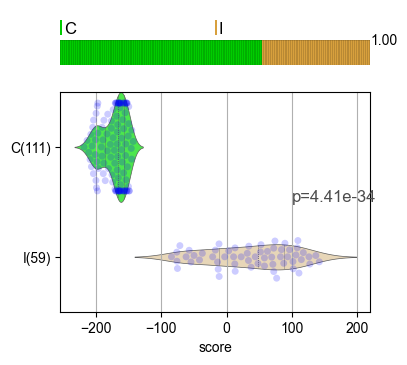

In [6]:
wt1, l1 = getViP()
ana = CoVAnalysis()
#ana.getMitchell2013(2)
ana.getMitchell2013(3)
#ana.getJones2019(4)
fig = processData(ana, l1, wt1, None, 1)

In [7]:
l1 = [bone.readList("list-2.txt")]
wt1 = [1]
ana = CoVAnalysis()
ana.getTang2019(2)
savePList("iav-list-1.txt", ana, l1)

Tang 2019 IAV (n = 159)
GSE101702 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV167
107 [63, 44] GSE101702 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV167 COV167


Tang 2019 IAV (n = 159)
GSE101702 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV167
159 [52, 63, 44] GSE101702 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV167 COV167
[23]


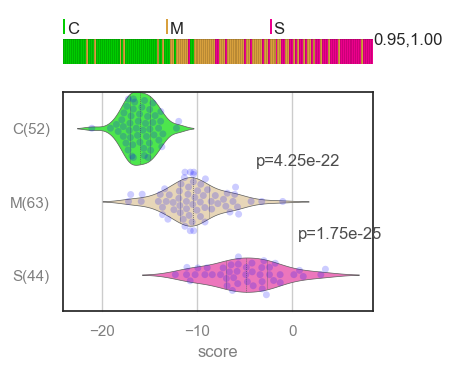

In [8]:
wt1, l1 = getSViP()
ana = CoVAnalysis()
#ana.getMitchell2013(2)
#ana.getMitchell2013(3)
#ana.getJones2019(4)
ana.getTang2019()
fig = processData(ana, l1, wt1, None, 1)

## Outcome Analysis on GSE157103

Jaitovich 2020 CoV2 HFD-45 (n = 126)
GSE157103 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV274
126 [26, 100] GSE157103 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV274 COV274
[23]
ROC-AUC 0.77
[-5.139202842131617, 73.40515059765511, -5.639202842131617, -4.639202842131617]
1.8063474559514963 -5.139202842131617
[327]
ROC-AUC 0.80
[-193.35989195716002, 68.55032683787117, -193.85989195716002, -192.85989195716002]
22.332283454400827 -193.35989195716002
[154]
ROC-AUC 0.79
[-198.30077597409385, 69.44201151948883, -198.80077597409385, -197.80077597409385]
11.293078458811316 -198.30077597409385
[14]
ROC-AUC 0.86
[-5.52029748376043, 86.36490503835721, -6.02029748376043, -5.02029748376043]
0.8634235563241158 -5.52029748376043
17 47 64


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


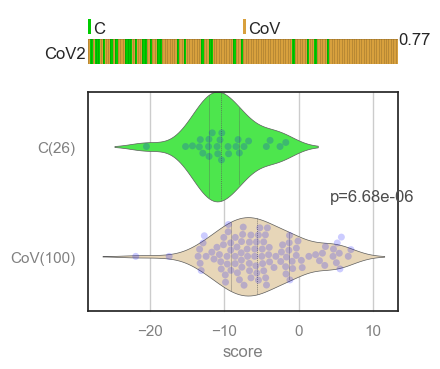

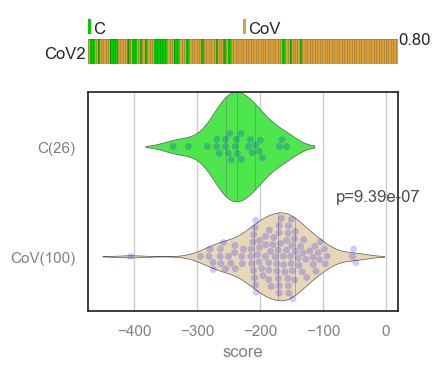

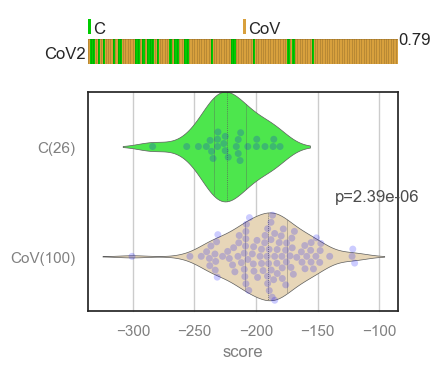

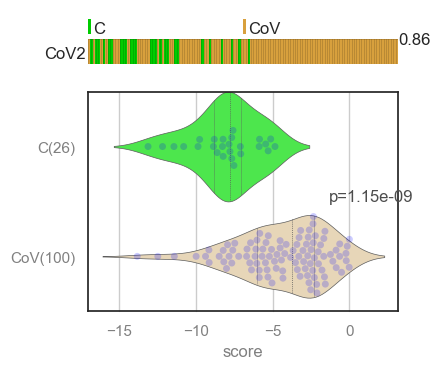

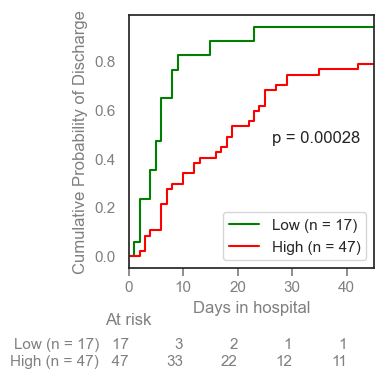

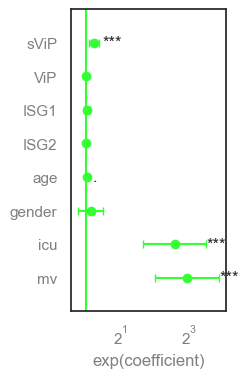

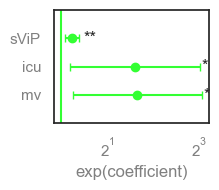

In [12]:
pdf = getPDF("surv-1.pdf")
ana = CoVAnalysis()
ana.getJaitovich2020()
df = pd.DataFrame()
time = ana.getSurvName('time')
ahash = {1:None, 'time':None}
df['time'] = [None if k in ahash else k for k in time]
df['status'] = ana.getSurvName('status')
atype = ana.getSurvName('c disease state')
ahash = {'COVID-19':1, 'non-COVID-19':0}
df['state'] = [ahash[k] if k in ahash else None for k in atype]
atype = ana.getSurvName('c icu')
ahash = {'yes':1, 'no':0}
df['icu'] = [ahash[k] if k in ahash else None for k in atype]
atype = ana.getSurvName('c mechanical ventilation')
ahash = {'yes':1, 'no':0}
df['mv'] = [ahash[k] if k in ahash else None for k in atype]
atype = ana.getSurvName('c Sex')
ahash = {'male':2, 'female':0, 'unknown': 1}
df['gender'] = [ahash[k] if k in ahash else None for k in atype]
atype = ana.getSurvName('c age (years)')
ahash = {6:None, 'c age (years)':None, ':':None, '>89':'89'}
df['age'] = [ahash[k] if k in ahash else k for k in atype]

l1 = [bone.readList("ifn-response-1.txt")]
wt1 = [1]
fig = processDataDf(ana, l1, wt1, "CoV2")
df['ISG1'] = [None, None] + list(ana.f_ranks)
pdf.savefig(fig, transparent=True)

l1 = [bone.readList("isg-2.txt")]
wt1 = [1]
fig = processDataDf(ana, l1, wt1, "CoV2")
df['ISG2'] = [None, None] + list(ana.f_ranks)
pdf.savefig(fig, transparent=True)

l1 = [bone.readList("list-2.txt")]
wt1 = [1]
fig = processDataDf(ana, l1, wt1, "CoV2")
df['ViP'] = [None, None] + list(ana.f_ranks)
pdf.savefig(fig, transparent=True)

l1 = [bone.readList("iav-list-1.txt")[0:20]]
wt1 = [1]
fig = processDataDf(ana, l1, wt1, "CoV2")
df['sViP'] = [None, None] + list(ana.f_ranks)
pdf.savefig(fig, transparent=True)

thr = hu.getThrData(ana.f_ranks)
nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/16
fthr = thr[0] + .248 * nm
#cov = set([i for i in ana.order if df.loc[i, 'state'] == 1 and
#           df.loc[i, 'age'] != '' and int(df.loc[i, 'age']) < 70])
cov = set([i for i in ana.order if df.loc[i, 'state'] == 1 and
           df.loc[i, 'age'] is not None and int(df.loc[i, 'age']) < 70])
g1 = [i for i in ana.order if ana.f_ranks[i - ana.start] < fthr]
g2 = [i for i in ana.order if ana.f_ranks[i - ana.start] >= fthr]
g1 = cov.intersection(g1)
g2 = cov.intersection(g2)
pG = [ ["Low" , "green", g1], ["High", "red", g2]]
for g in pG:
    g[0] += " (n = " +  str(len(g[2])) + ")"
print(len(g1), len(g2), len(cov))
time = [None if k == None else 45 - int(k) for k in df['time']]
status = [df['status'][i] if df['time'][i] != '0' else '0' for i in range(len(time))]
ax = hu.survivalCDF(time, status, pG)
ax.set_xlabel('Days in hospital')
ax.set_ylabel('Cumulative Probability of Discharge')
pdf.savefig(transparent=True)

vals = list(range(ana.start)) + list(ana.f_ranks)
order = cov.intersection(ana.order)
#res = hu.getBestThr(time, status, vals, order, None, None, 5)
#print (res, fthr, thr, nm, (res[0][1] - thr[0])/nm)
df = df.loc[cov,]
df.replace
df.dropna(inplace=True)
dfu, dfm = hu.Multivariate(df[['time', 'status', 'sViP', 'ViP', 'ISG1', 'ISG2',
                               'age', 'gender', 'icu', 'mv']])
ax = hu.plotCoef(dfu)
ax.set_xscale('log', basex=2)
pdf.savefig(transparent=True)
#ax = hu.plotCoef(dfm)
#ax.set_xscale('log', basex=2)
#pdf.savefig(transparent=True)
dfu, dfm = hu.Multivariate(df[['time', 'status', 'sViP', 'icu', 'mv']])
ax = hu.plotCoef(dfm)
ax.set_xscale('log', basex=2)
pdf.savefig(transparent=True)
closePDF(pdf)

In [9]:
db = hu.Database("explore.conf")
dbid = "COV1"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()
title = h.getTitle()
print title
atype = h.getSurvName("c timepoint")
atype = [re.sub("h.*", "", str(k)) for k in atype]
hu.uniq(atype)

Mitchell 2013 Flu (GSE47963; n = 438)


['8',
 'c timepoint',
 '48',
 '72',
 '84',
 '96',
 '36',
 '0',
 '60',
 '18',
 '24',
 '12',
 '6']